In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [160]:
df = pd.read_csv('/Users/arqavan/Downloads/mobile_data.csv')

In [161]:
df['Battery_capacity'] = df['Battery_capacity'].str.extract('(\d+)')
df['Battery_capacity'] = pd.to_numeric(df['Battery_capacity'], errors='coerce')
battery_mean = df['Battery_capacity'].mean()
df['Battery_capacity'] = df['Battery_capacity'].fillna(battery_mean)

df['Price'] = df['Price'].str.extract(r'(\d+)')  

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
price_mean = df['Price'].mean()
df['Price'] = df['Price'].fillna(price_mean)
df = df.drop_duplicates()

# Standardscaler

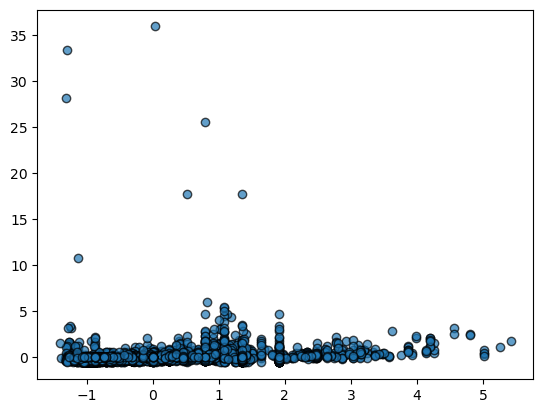

In [162]:
scaler = StandardScaler()
X = df[['Battery_capacity', 'Price']]
X_standard = scaler.fit_transform(X)

plt.scatter(X_standard[:, 0], X_standard[:, 1], alpha=0.7, edgecolors='k')
plt.show()

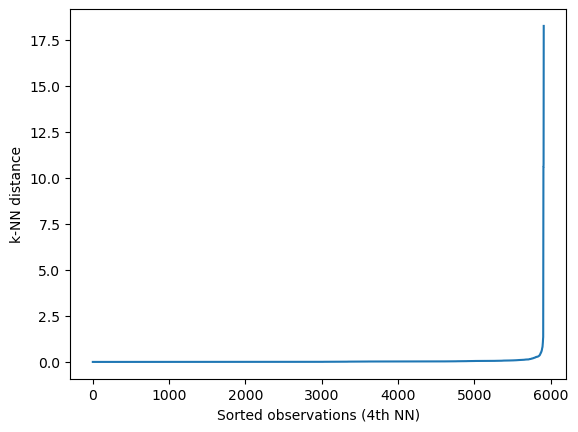

In [163]:

# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 5).fit(X_standard)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X_standard)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [164]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

10.59297973971629


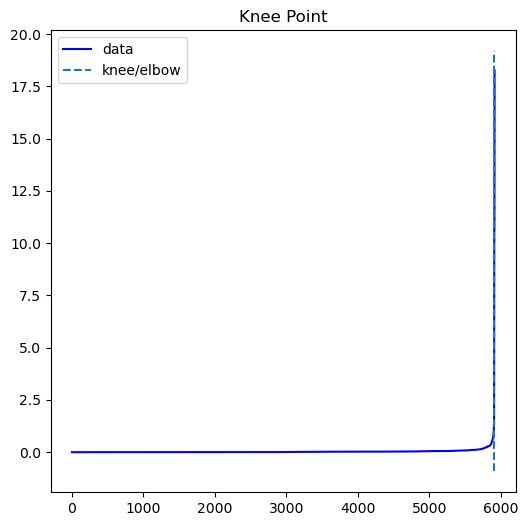

In [165]:
kneedle.plot_knee()
plt.show()

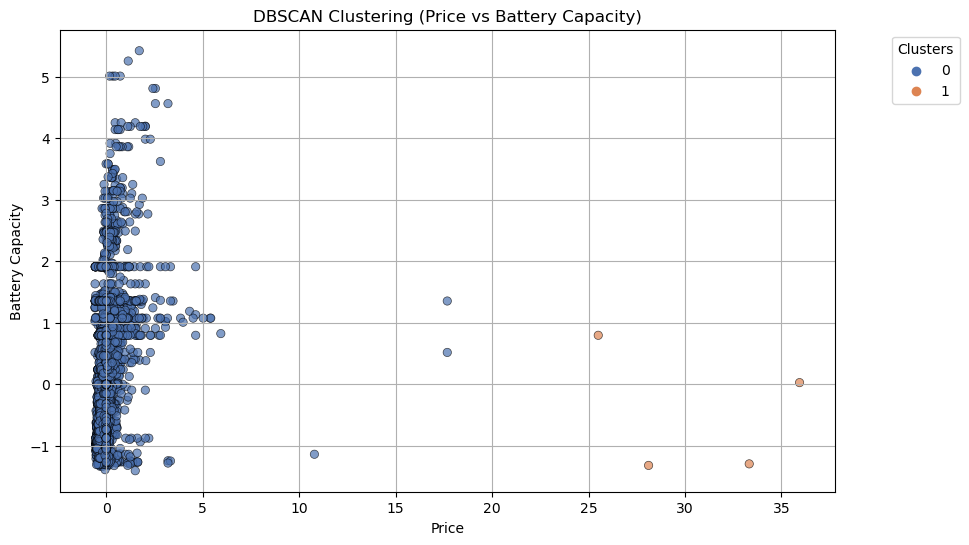

Silhouette Score: 0.9589856188211109
Davies-Bouldin Index: 0.16007791871233792
Clusters: 2


In [166]:
dbscan = DBSCAN(eps =10.5, min_samples=5)
clusters = dbscan.fit_predict(X_standard)

df_clustered = pd.DataFrame(X_standard, columns=['Battery_capacity', 'Price'])
df_clustered['Cluster'] = clusters

plt.figure(figsize=(10, 6))
p = sns.scatterplot(
    data=df_clustered,
    x="Price",
    y="Battery_capacity",
    hue="Cluster",
    palette="deep",
    legend="full",
    alpha=0.7,
    edgecolor="k"
)
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.0), title="Clusters")
plt.title("DBSCAN Clustering (Price vs Battery Capacity)")
plt.xlabel("Price")
plt.ylabel("Battery Capacity")
plt.grid(True)
plt.show()
sil_score = silhouette_score(X_standard, clusters)
print(f"Silhouette Score: {sil_score}")
db_index = davies_bouldin_score(X_standard, clusters)
print(f"Davies-Bouldin Index: {db_index}")
print(f"Clusters: {len(set(clusters)) - (1 if -1 in clusters else 0)}")


Best Params - eps: 5.6, min_samples: 2
Silhouette Score: 0.9294, Noise Ratio: 0.00%
Number of Clusters: 3


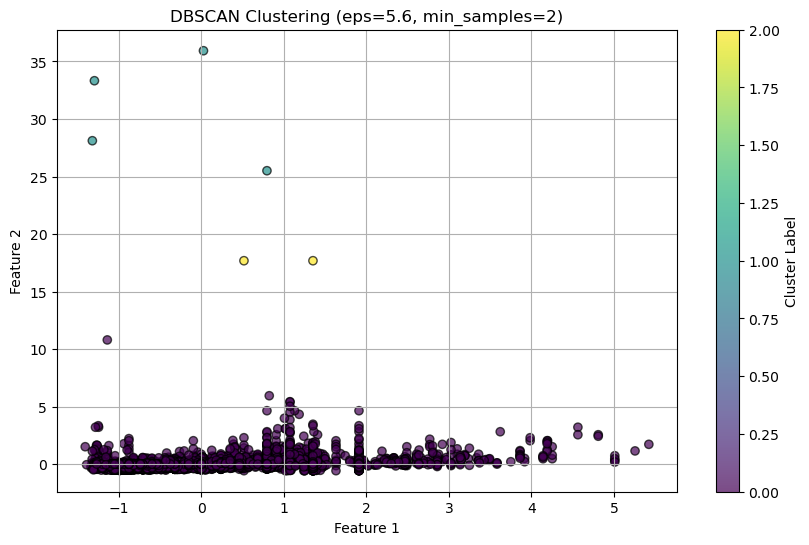

In [167]:

eps_values = np.arange(0.1, 20, 0.5)
min_samples_values = range(2, 20)
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_standard)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters == 3:
            sil_score = silhouette_score(X_standard, clusters)
            noise_ratio = (clusters == -1).sum() / len(clusters)
            results.append((eps, min_samples, sil_score, noise_ratio))

results.sort(key=lambda x: x[2], reverse=True)

if results:
    best_params = results[0]
    print(f"Best Params - eps: {best_params[0]}, min_samples: {best_params[1]}")
    print(f"Silhouette Score: {best_params[2]:.4f}, Noise Ratio: {best_params[3]:.2%}")

   
    dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
    clusters = dbscan.fit_predict(X_standard)
    
   
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    print(f"Number of Clusters: {n_clusters}")
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_standard[:, 0], X_standard[:, 1], c=clusters, cmap='viridis', alpha=0.7, edgecolors='k')
    plt.title(f'DBSCAN Clustering (eps={best_params[0]}, min_samples={best_params[1]})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.show()
else:
    print("No parameter combination resulted in exactly 3 clusters.")


In [168]:
#eps_values = np.arange(0.1, 20, 0.5)
#min_samples_values = range(2, 20)
#results = []

#for eps in eps_values:
#    for min_samples in min_samples_values:
#       dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#        clusters = dbscan.fit_predict(X)
#        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
#        if n_clusters == 3:
#            sil_score = silhouette_score(X, clusters)
#            noise_ratio = (clusters == -1).sum() / len(clusters)
#            results.append((eps, min_samples, sil_score, noise_ratio))
#
#results.sort(key=lambda x: x[2], reverse=True)
#best_params = results[0]
#print(f"Best Params - eps: {best_params[0]}, min_samples: {best_params[1]}")
#print(f"Silhouette Score: {best_params[2]:.4f}, Noise Ratio: {best_params[3]:.2%}")

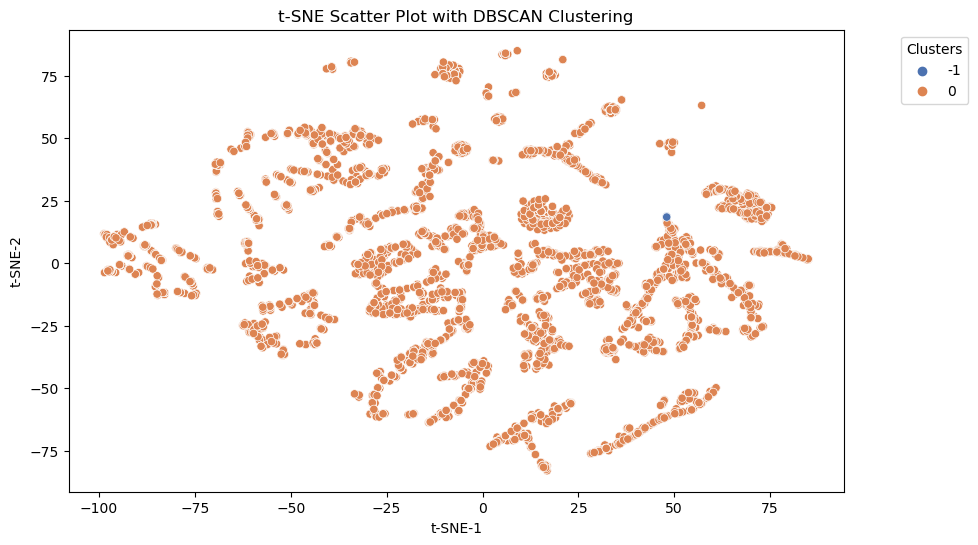

Silhouette Score: 0.9589856188211109
Clusters: 1
Silhouette Score: 0.9589856188211109
Davies-Bouldin Index: 0.16007791871233792


In [169]:
dbscan = DBSCAN(eps=10, min_samples=8)
clusters = dbscan.fit_predict(X_standard)

df_clustered = pd.DataFrame(X_standard, columns=['Battery_capacity', 'Price'])
df_clustered['Cluster'] = clusters

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_standard)

df_clustered['t-SNE-1'] = X_tsne[:, 0]
df_clustered['t-SNE-2'] = X_tsne[:, 1]

plt.figure(figsize=(10, 6))
p = sns.scatterplot(
    data=df_clustered,
    x="t-SNE-1",
    y="t-SNE-2",
    hue="Cluster",
    legend="full",
    palette="deep"
)
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.0), title="Clusters")
plt.title("t-SNE Scatter Plot with DBSCAN Clustering")
plt.show()
sil_score = silhouette_score(X_standard, clusters)
print(f"Silhouette Score: {sil_score}")

print(f"Clusters: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"Silhouette Score: {sil_score}")
db_index = davies_bouldin_score(X_standard, clusters)
print(f"Davies-Bouldin Index: {db_index}")


# MinMaxScaler

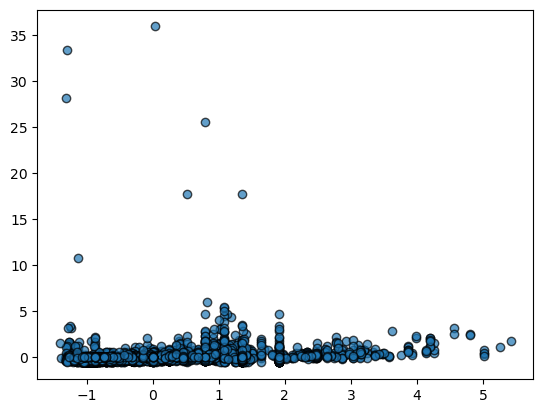

In [170]:
scaler = StandardScaler()
X = df[['Battery_capacity', 'Price']]
X_minmax = scaler.fit_transform(X)

plt.scatter(X_minmax[:, 0], X_minmax[:, 1], alpha=0.7, edgecolors='k')
plt.show()

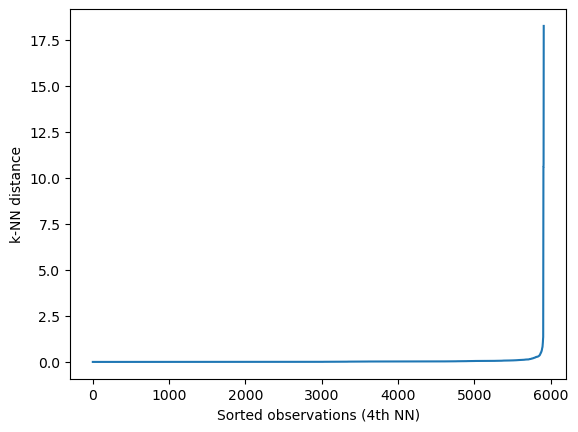

In [171]:
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 5).fit(X_minmax)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X_minmax)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [172]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

10.59297973971629


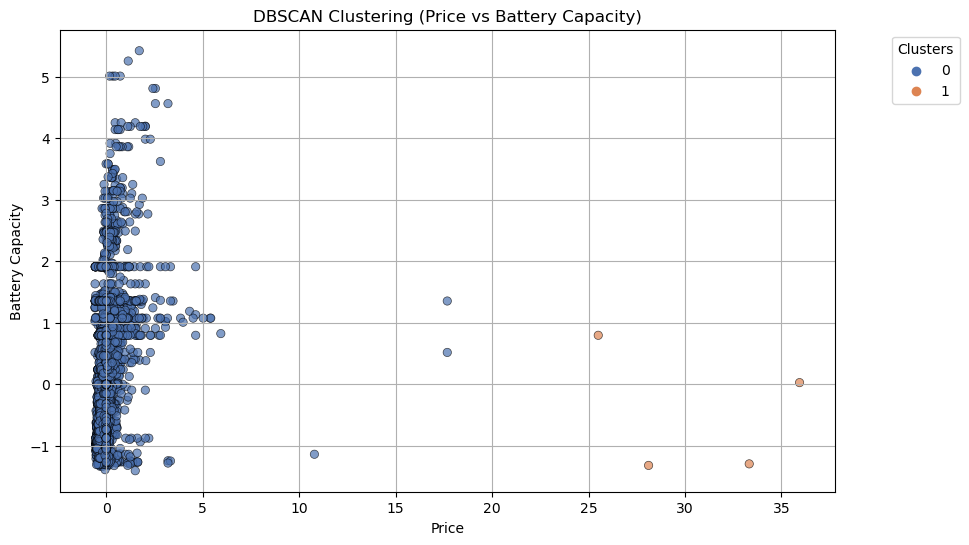

Clusters: 2
Silhouette Score: 0.9589856188211109
Davies-Bouldin Index: 0.16007791871233792


In [173]:
dbscan = DBSCAN(eps =10.5, min_samples=6)
clusters = dbscan.fit_predict(X_minmax)

df_clustered = pd.DataFrame(X_minmax, columns=['Battery_capacity', 'Price'])
df_clustered['Cluster'] = clusters

plt.figure(figsize=(10, 6))
p = sns.scatterplot(
    data=df_clustered,
    x="Price",
    y="Battery_capacity",
    hue="Cluster",
    palette="deep",
    legend="full",
    alpha=0.7,
    edgecolor="k"
)
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.0), title="Clusters")
plt.title("DBSCAN Clustering (Price vs Battery Capacity)")
plt.xlabel("Price")
plt.ylabel("Battery Capacity")
plt.grid(True)
plt.show()
sil_score = silhouette_score(X_minmax, clusters)

print(f"Clusters: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"Silhouette Score: {sil_score}")
db_index = davies_bouldin_score(X_minmax, clusters)
print(f"Davies-Bouldin Index: {db_index}")